# Machine learning applied on a cars dataset from Avito

## Visualization of the dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('finalDataset.csv')
# Drop the first column
df = df.drop(df.columns[0], axis=1)
df

,Mileage,Model Year,Brand,Model,Nombre de portes,Origine,Première main,Fuel type,Fiscal power,boiteVitesse,Price
0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6 CV,Manuelle,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,NaN,NaN,NaN,Diesel,7 CV,Manuelle,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,5.0,NaN,Non,Diesel,6 CV,Manuelle,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,5.0,WW au Maroc,Non,Diesel,12 CV,Automatique,NaN
4,150 000 - 159 999,2008,Daihatsu,Sirion,NaN,NaN,NaN,Essence,--,--,48000.0
...,...,...,...,...,...,...,...,...,...,...,...
64852,NaN,2001,NaN,NaN,NaN,NaN,NaN,Diesel,9 CV,NaN,83000.0
64853,10000-14999,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0
64854,NaN,2007,NaN,NaN,NaN,NaN,NaN,Diesel,10 CV,NaN,120000.0
64855,0-4999,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500.0


## Checking the number of null values

In [2]:
# Checking null values
df.isnull().sum()

Mileage                10
Model Year              5
Brand                  18
Model                  18
Nombre de portes    31574
Origine             33010
Première main       34638
Fuel type              12
Fiscal power         9288
boiteVitesse        35874
Price                3160
dtype: int64

### We will start by dropping the columns that have less than 40000/64857 non null values

In [3]:
# Drop columns with non-NA count less than threshold that is more than half the rows number
df = df.dropna(axis=1, thresh=40000)
df.isnull().sum()

Mileage           10
Model Year         5
Brand             18
Model             18
Fuel type         12
Fiscal power    9288
Price           3160
dtype: int64

### For the rest of non null values we will replace them with the mode (the most frequent value)

In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # or median, most_frequent, constant, etc.
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isnull().sum()

Mileage         0
Model Year      0
Brand           0
Model           0
Fuel type       0
Fiscal power    0
Price           0
dtype: int64

### Here we can see that the dataset doesn't contain any non null value

In [5]:
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6 CV,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7 CV,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6 CV,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12 CV,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,--,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9 CV,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6 CV,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10 CV,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6 CV,10500.0


#### We have to clean the "Fiscal power" column, first of all we replace the value 'Plus de 41' by 41

In [6]:
df['Fiscal power'] = df['Fiscal power'].str.strip().replace('Plus de 41', 41, regex=True)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6 CV,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7 CV,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6 CV,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12 CV,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,--,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9 CV,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6 CV,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10 CV,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6 CV,10500.0


#### Then the value "--" by null, we will have to replace it with the most frequent value later

In [7]:
df['Fiscal power'].replace(['--'], np.nan, inplace=True)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6 CV,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7 CV,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6 CV,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12 CV,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,NaN,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9 CV,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6 CV,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10 CV,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6 CV,10500.0


#### We remove the " CV" to keep just the number of horses

In [9]:
df['Fiscal power'] = df['Fiscal power'].str.strip().replace('CV', '', regex=True)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,NaN,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6,10500.0


In [10]:
imputer = SimpleImputer(strategy='most_frequent')  
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['Fiscal power'] = df['Fiscal power'].astype(int)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,6,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6,10500.0


#### Now we have to clean the "Mileage" column by removing spaces and transforming odd values.

In [11]:
# Convert non numerical values
df['Mileage'] = df['Mileage'].str.replace(' ', '')
df['Mileage'] = df['Mileage'].str.replace('Plusde500000', '500000-1000000')
df['Model Year'] = df['Model Year'].str.replace('1980 ou plus ancien', '1980')
df['Mileage'].unique()

array(['90000-94999', '25000-29999', '250000-299999', '200000-249999',
       '150000-159999', '170000-179999', '300000-349999', '130000-139999',
       '10000-14999', '140000-149999', '75000-79999', '190000-199999',
       '0-4999', '110000-119999', '55000-59999', '30000-34999',
       '180000-189999', '160000-169999', '95000-99999', '35000-39999',
       '80000-84999', '15000-19999', '350000-399999', '5000-9999',
       '120000-129999', '20000-24999', '60000-64999', '40000-44999',
       '85000-89999', '65000-69999', '100000-109999', '70000-74999',
       '400000-449999', '50000-54999', '450000-499999', '500000-1000000',
       '45000-49999'], dtype=object)

#### We get the center of the range for the mileage and use it as a column

#### And lastly we replace the nan value we created before and transform the column type to int.
#### The column has been totally cleaned

In [12]:
# Remove spaces and convert the columns to integers
df[['lower_mileage', 'upper_mileage']] = df['Mileage'].str.split('-', expand=True).astype(int)
# Calculate the mid_point
df['Mid_Point'] = (df['lower_mileage'] + df['upper_mileage']) / 2
df = df.drop(['lower_mileage', 'upper_mileage', 'Mileage'], axis=1)
df

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,2012,Peugeot,206+,Essence,6,60000.0,92499.5
1,2011,Peugeot,Partner,Diesel,7,62000.0,27499.5
2,2010,Dacia,Sandero,Diesel,6,65000.0,274999.5
3,2008,Volkswagen,Touareg,Diesel,12,55000.0,224999.5
4,2008,Daihatsu,Sirion,Essence,6,48000.0,154999.5
...,...,...,...,...,...,...,...
64852,2001,Renault,Logan,Diesel,9,83000.0,224999.5
64853,2019,Renault,Logan,Diesel,6,7000.0,12499.5
64854,2007,Renault,Logan,Diesel,10,120000.0,224999.5
64855,2018,Renault,Logan,Diesel,6,10500.0,2499.5


#### We just just need to get rid of the outliers

In [13]:
z_scores = np.abs((df['Price'] - df['Price'].mean()) / df['Price'].std())
threshold = 2.5
df = df[z_scores <= threshold]
df

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,2012,Peugeot,206+,Essence,6,60000.0,92499.5
1,2011,Peugeot,Partner,Diesel,7,62000.0,27499.5
2,2010,Dacia,Sandero,Diesel,6,65000.0,274999.5
3,2008,Volkswagen,Touareg,Diesel,12,55000.0,224999.5
4,2008,Daihatsu,Sirion,Essence,6,48000.0,154999.5
...,...,...,...,...,...,...,...
64852,2001,Renault,Logan,Diesel,9,83000.0,224999.5
64853,2019,Renault,Logan,Diesel,6,7000.0,12499.5
64854,2007,Renault,Logan,Diesel,10,120000.0,224999.5
64855,2018,Renault,Logan,Diesel,6,10500.0,2499.5


### The data have been totally cleaned, it can be encoded now to apply machine learning algorithms on it

In [14]:
# Encode categorical data
encoder = LabelEncoder()
categorical_columns = df.iloc[:, 1:4]

df_encoded = df

for column in categorical_columns:
    df_encoded[column] = encoder.fit_transform(df[column])

df_encoded

/tmp/ipykernel_27377/2001550860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[column] = encoder.fit_transform(df[column])
/tmp/ipykernel_27377/2001550860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[column] = encoder.fit_transform(df[column])
/tmp/ipykernel_27377/2001550860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,2012,49,33,3,6,60000.0,92499.5
1,2011,49,568,1,7,62000.0,27499.5
2,2010,17,660,1,6,65000.0,274999.5
3,2008,62,727,1,12,55000.0,224999.5
4,2008,19,692,3,6,48000.0,154999.5
...,...,...,...,...,...,...,...
64852,2001,52,492,1,9,83000.0,224999.5
64853,2019,52,492,1,6,7000.0,12499.5
64854,2007,52,492,1,10,120000.0,224999.5
64855,2018,52,492,1,6,10500.0,2499.5


# Unsupervised Machine learning
## Kmeans clusterisation

#### We will apply the kmeans algorithm on the dataset to divide it in clusters, we will start by using the elbow method to choose how many clusters we want

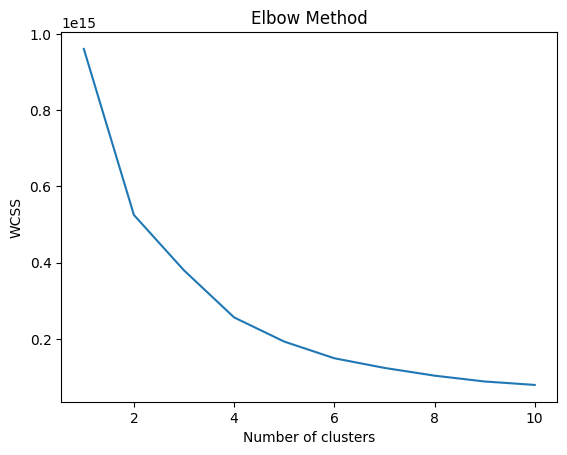

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# let's assume our max number of clusters would be 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### We can see here that 4 is in the "Elbow" of the graph, we'll take it as a parameter

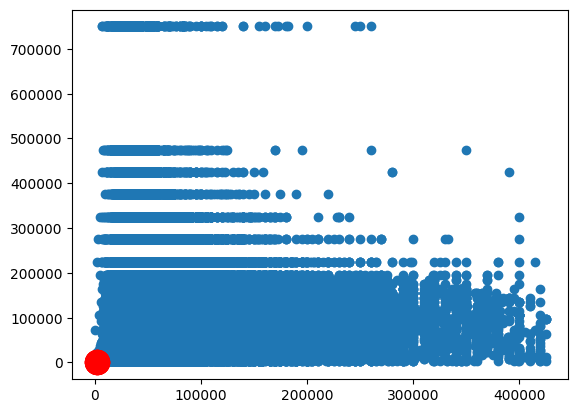

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_encoded)

# Visualize the clusters
plt.scatter(df_encoded['Price'], df_encoded['Mid_Point'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


### The clusters are not very clear, we'll try feature scaling since K-means are very sensitive to scale, and get rid of outliers

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_encoded)

# Convert the numpy array back into a pandas DataFrame 
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,0.616075,0.566379,-1.513855,1.764185,-0.574417,-0.368246,-0.348727
1,0.502373,0.566379,0.746243,-0.564245,-0.064997,-0.333953,-0.954303
2,0.388671,-1.247991,1.134895,-0.564245,-0.574417,-0.282514,1.351544
3,0.161267,1.303466,1.417936,-0.564245,2.482105,-0.453977,0.885717
4,0.161267,-1.134593,1.270079,1.764185,-0.574417,-0.574001,0.233558
...,...,...,...,...,...,...,...
64389,-0.634646,0.736476,0.425182,-0.564245,0.953844,0.026119,0.885717
64390,1.411988,0.736476,0.425182,-0.564245,-0.574417,-1.276998,-1.094051
64391,0.047565,0.736476,0.425182,-0.564245,1.463264,0.660531,0.885717
64392,1.298286,0.736476,0.425182,-0.564245,-0.574417,-1.216986,-1.187217


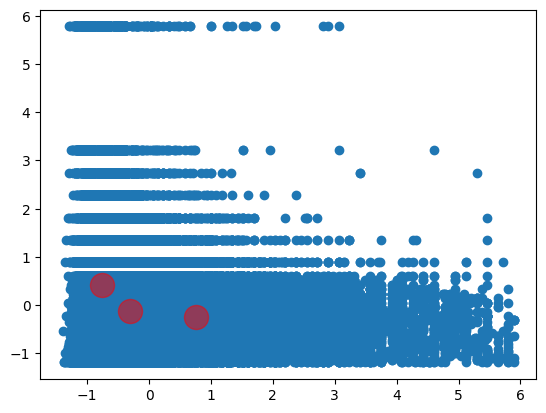

In [18]:
# Apply K-means clustering
kmeans_scaled = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_scaled = kmeans_scaled.fit_predict(df_scaled)

# Visualize the clusters (you can change 'Price' and 'mid_point' to other numerical columns if needed)
plt.scatter(df_scaled['Price'], df_scaled['Mid_Point'])
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='red', alpha = 0.5)
plt.show()


/tmp/ipykernel_27377/1070105777.py:13: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=principalDf, palette=['red', 'blue', 'green'])


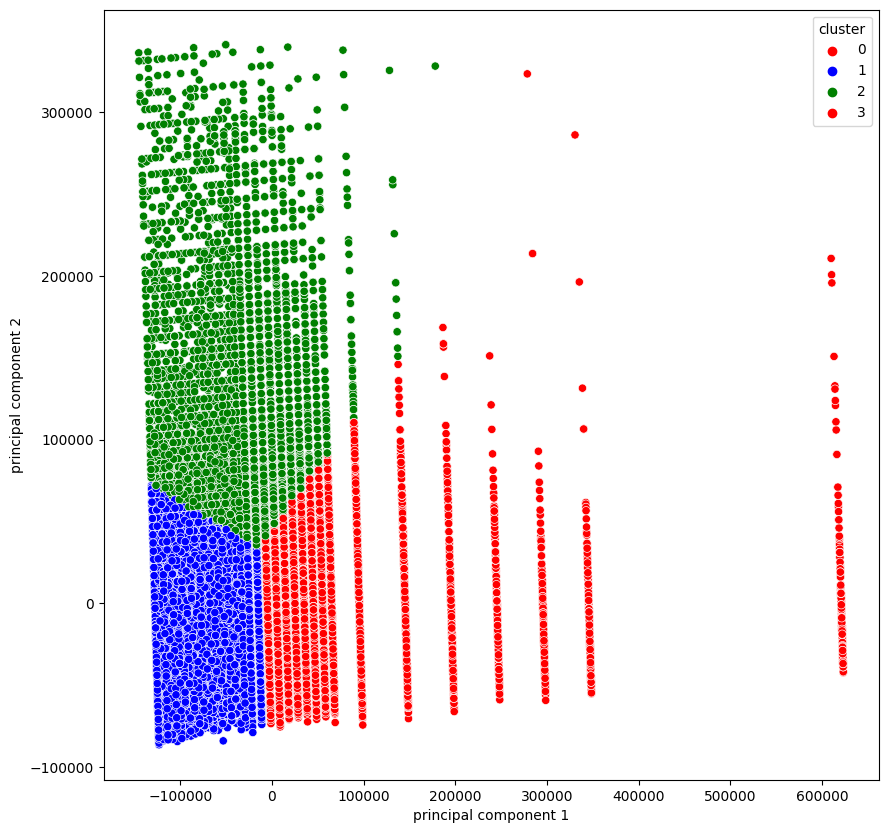

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Adding cluster to the principalDf
principalDf = pd.concat([principalDf, pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)

# Visualize the clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=principalDf, palette=['red', 'blue', 'green'])
plt.show()

#### Let's make a dataframe where we map each model in a category

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assume that you have the original data before encoding in a DataFrame called original_df
original_df = pd.read_csv('finalDataset.csv')
original_df = original_df[z_scores <= threshold]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the car models in the original data
le.fit(original_df['Model'])

# Now create a new column in your dataframe with the decoded car model names
df_encoded['Model'] = le.inverse_transform(df_encoded['Model'])

# Now add the cluster labels as a new column in the DataFrame
df_encoded['cluster'] = kmeans.labels_

# Create a new DataFrame with the car model as the index
df_clusters = df.set_index('Model')

# Use groupby to create a DataFrame with the cluster as columns
df_clusters = df_clusters.groupby(['Model', 'cluster']).size().unstack(fill_value=0)

df_clusters.columns = ['cluster_{}'.format(cluster) for cluster in df_clusters.columns]
df_clusters

/tmp/ipykernel_27377/1018100768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Model'] = le.inverse_transform(df_encoded['Model'])
/tmp/ipykernel_27377/1018100768.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['cluster'] = kmeans.labels_


,cluster_0,cluster_1,cluster_2,cluster_3
Model,,,,
100,3,3,0,0
1007,2,4,0,0
104,5,31,1,4
106,14,40,0,1
107,15,36,0,0
...,...,...,...,...
santa_fe,0,1,0,0
serie_3,0,0,1,0
super5,0,1,0,0


# Since we made dimension reduction before we can't know directly what each cluster means, so we will just see the mean value of some columns, and assume that clusters are related to them.

In [27]:
# Group the DataFrame by the cluster labels and calculate the mean price of each group
mean_price_per_cluster = df.groupby('cluster')['Price'].mean()
mean_power_per_cluster = df.groupby('cluster')['Fiscal power'].mean()
mean_mileage_per_cluster = df.groupby('cluster')['Mid_Point'].mean()

print(mean_price_per_cluster)
print("/n")
print(mean_power_per_cluster)
print("/n")
print(mean_mileage_per_cluster)
print("/n")

cluster
0     69617.537332
1     62269.060921
2    202936.437923
3     53743.332394
Name: Price, dtype: float64
/n
cluster
0    7.197198
1    6.868274
2    7.692738
3    7.440090
Name: Fiscal power, dtype: float64
/n
cluster
0    190620.257695
1     46682.190580
2    101032.490630
3    411967.416690
Name: Mid_Point, dtype: float64
/n


#### The average of fiscal power stays the same, so we can say from mileage and price that there are 4 groups:

### 1 - Economic used cars
### 2 - Economic good state cars
### 3 - Expensive cars
### 4 - Low value old cars

# It seems that cluster 0 is economic, cluster 1 is mid-range and custer 2 is luxury

In [28]:
df_clusters = df_clusters.rename(columns={'cluster_0': 'economic_used', 'cluster_1': 'economic_good_state', 'cluster_2': 'expensive', 'cluster_3': 'old_low_value'})
df_clusters

,economic_used,economic_good_state,expensive,old_low_value
Model,,,,
100,3,3,0,0
1007,2,4,0,0
104,5,31,1,4
106,14,40,0,1
107,15,36,0,0
...,...,...,...,...
santa_fe,0,1,0,0
serie_3,0,0,1,0
super5,0,1,0,0


#### Let's check the value of a particual car to see where it belongs

In [29]:
df_clusters.loc["208"]

economic_used           45
economic_good_state    324
expensive                6
old_low_value            2
Name: 208, dtype: int64

#### We can see that it's mainly a mid range car

In [30]:
df_clusters.loc["Golf"]

economic_used           52
economic_good_state    154
expensive               26
old_low_value           26
Name: Golf, dtype: int64

#### Also a mid range car, but probably have many old models

# Supervised price prediction

In [32]:
df_encoded['Model'] = le.transform(df_encoded['Model'])
df_encoded

/tmp/ipykernel_27377/3417504711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Model'] = le.transform(df_encoded['Model'])


,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point,cluster
0,2012,49,33,3,6,60000.0,92499.5,1
1,2011,49,568,1,7,62000.0,27499.5,1
2,2010,17,660,1,6,65000.0,274999.5,0
3,2008,62,727,1,12,55000.0,224999.5,0
4,2008,19,692,3,6,48000.0,154999.5,0
...,...,...,...,...,...,...,...,...
64852,2001,52,492,1,9,83000.0,224999.5,0
64853,2019,52,492,1,6,7000.0,12499.5,1
64854,2007,52,492,1,10,120000.0,224999.5,0
64855,2018,52,492,1,6,10500.0,2499.5,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features and target variable
X = df_encoded.drop(['Price', 'cluster'], axis=1)
y = df_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make price predictions
y_pred = model.predict(X_test)

# Print the predicted prices
print(y_pred)

[105258.7739819   17304.66000692  37164.76129162 ... 103740.76569049
 107493.77248382 125232.21944577]


In [34]:
# Create an empty dictionary to store parameter values
data = {}

# Get input from the user for each parameter
data['Model Year'] = 2006           
data['Brand'] = 'Peugeot'                  
data['Model'] = '208'                    
data['Fuel type'] = 'Essence'               
data['Fiscal power'] = 6             
data['Mid_Point'] = 20000                


data = {
    'Model Year': input("Enter Model Year: "),
    'Brand': input("Enter Brand: "),
    'Model': input("Enter Model: "),
    'Fuel type': input("Enter Fuel type: "),
    'Fiscal power': input("Enter Fiscal power: "),
    'Mid_Point': input("Enter Mid Point: ")
}

data = pd.DataFrame(data, index=['ID'])
data.index.name = 'Index'
print(data)

      Model Year    Brand Model Fuel type Fiscal power Mid_Point
Index                                                           
ID          2016  Peugeot   208    Diesel            6    200000


In [35]:
# Assume that you have the original data before encoding in a DataFrame called original_df
original_df = pd.read_csv('finalDataset.csv')

# Create a LabelEncoder object for each categorical column
brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()

# Fit the encoders to the car models in the original data
brand_encoder.fit(original_df['Brand'])
model_encoder.fit(original_df['Model'])
fuel_type_encoder.fit(original_df['Fuel type'])

# Transform the data using the fitted encoders
data['Brand'] = brand_encoder.transform([data['Brand']])[0]
data['Model'] = model_encoder.transform([data['Model']])[0]
data['Fuel type'] = fuel_type_encoder.transform([data['Fuel type']])[0]

data

/home/amine/PythonProjects/VirtualEnvironments/data_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/amine/PythonProjects/VirtualEnvironments/data_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/amine/PythonProjects/VirtualEnvironments/data_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtyp

,Model Year,Brand,Model,Fuel type,Fiscal power,Mid_Point
Index,,,,,,
ID,2016,49,38,1,6,200000


In [36]:
predicted_price = model.predict(data[['Model Year', 'Brand', 'Model', 'Fuel type', 'Fiscal power', 'Mid_Point']])

predicted_price

array([117131.86994322])

In [37]:
original_df['Model'].unique()

array(['206+', 'Partner', 'Sandero', 'Touareg', 'Sirion', 'Duster', '407',
       'Macan', '250', 'Punto', 'Corolla', 'Santa Fe', 'Classe E', 'C4',
       'Clio', 'Qashqai', 'Berlingo', 'R11', '206', 'Symbol', 'Palio',
       'Elantra', 'Bora', 'i 40', 'Dokker', 'Vitara', 'Insignia', 'Uno',
       '405', 'Tiguan', '220', 'A113', 'Fiesta', 'Jetta', 'Leon', 'Doblo',
       'Logan', 'Pinto', 'Passat', '207', '308', 'Kangoo', 'Megane', 'Q3',
       '208', 'Golf', 'Ceed', 'REGATA', '307', '500', 'Touran', 'Picanto',
       'i 20', '270', 'Range Rover Evoque', 'C3', 'Serie 3 coupé', '406',
       'Crossland X', 'Classe A', 'Serie 4', 'Accent', 'Classe C',
       'Carens', 'Astra', 'Serie 7', 'i 30', 'Megane Coupe', '2',
       'Range Rover', 'Polo', 'GOLF 5', 'Tucson', 'Scenic', 'Civic',
       'i 10', 'A4', 'RAV 4', 'cooper', 'Wrangler', '190', 'A3', '3008',
       'Q5', 'D-MAX', 'Siena', '2008', 'pajero', 'Mondeo', 'CR-V', '309',
       'Panda', 'C-Elysée', 'Prado', 'C5', 'Serie 5', '310D'